## US_VISA Prediction 
* Understanding the problem statement
* Data collections
* Exploring the data 
* Data cleaning 
* Data pre processing 
* Model training 
* Choosing the best model 


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df = pd.read_csv("/Users/anand/Desktop/us-visa-ml/notebook/EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<bound method NDFrame.describe of          case_id continent education_of_employee has_job_experience  \
0         EZYV01      Asia           High School                  N   
1         EZYV02      Asia              Master's                  Y   
2         EZYV03      Asia            Bachelor's                  N   
3         EZYV04      Asia            Bachelor's                  N   
4         EZYV05    Africa              Master's                  Y   
...          ...       ...                   ...                ...   
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
0                         N            14513        

### Shape of the data 

In [9]:
df.shape

(25480, 12)

### Summary of the data set 

In [8]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### cheking the data types 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### Exploring Data

In [15]:
numerical_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print("Numerical Features: ", numerical_features)
print("Categorical Features " , categorical_features)

Numerical Features:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical Features  ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [18]:
for col in categorical_features:
    print(df[col].value_counts(normalize = True) * 100)

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, dtype: float64
unit_o

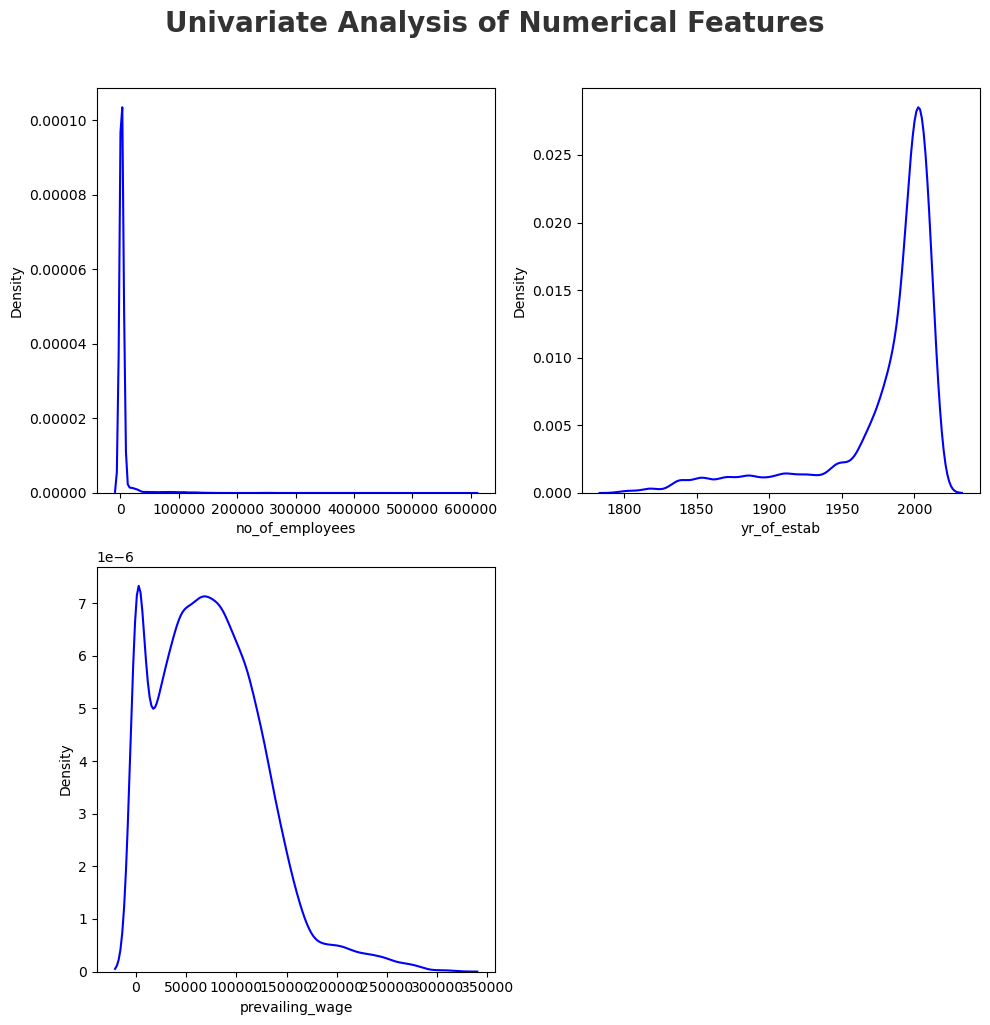

In [42]:
plt.figure(figsize=(10 , 10))
plt.suptitle("Univariate Analysis of Numerical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

for i in range(0 , len(numerical_features)):
    plt.subplot(2, 2, i + 1) 
    sns.kdeplot(x = df[numerical_features[i]] , color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
    
plt.show()

#### Insights 
* no of employees is more skewed
* year of establisment  is skewed to the right
* AS because we might have a lot of outliers


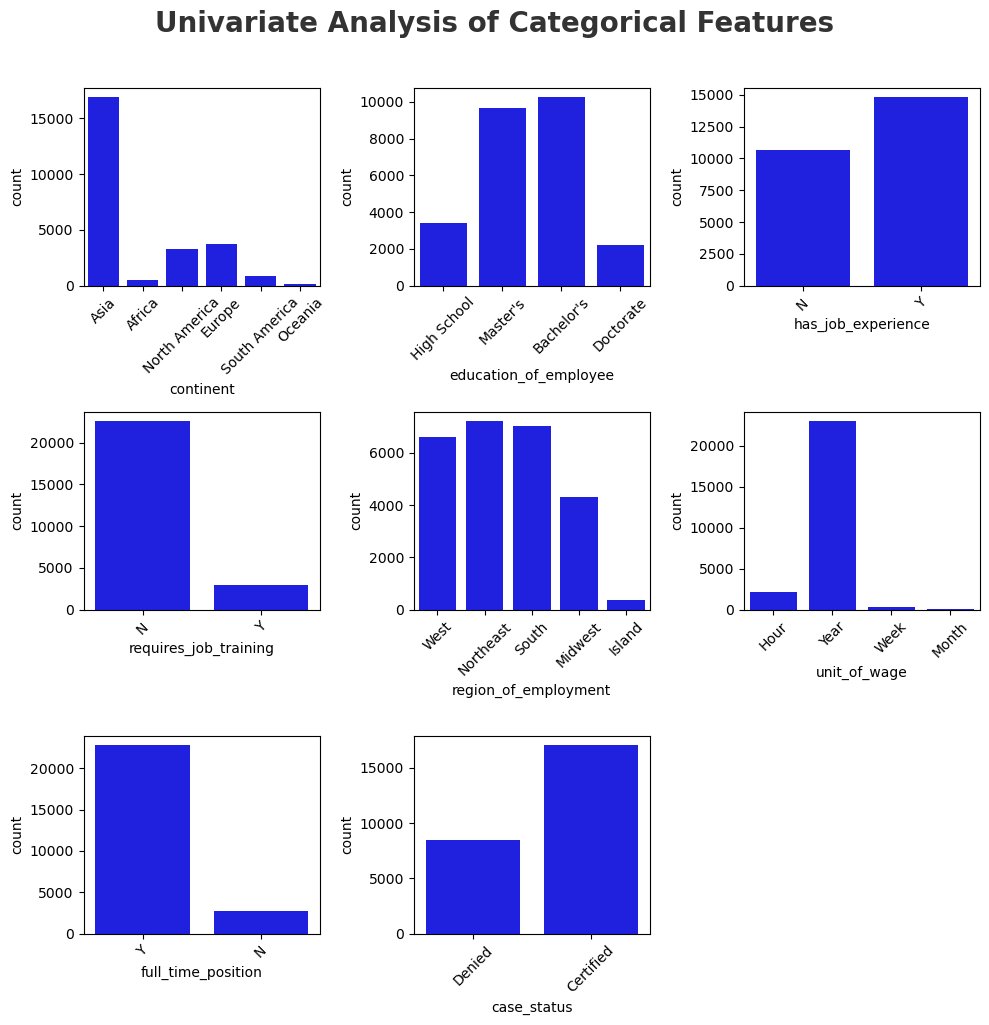

In [37]:
# Ensure "case_id" is removed only if it exists in the list
if "case_id" in categorical_features:
    categorical_features.remove("case_id")

plt.figure(figsize=(10 , 10))
plt.suptitle("Univariate Analysis of Categorical Features", 
             fontsize=20, fontweight="bold", alpha=0.8, y=1.02)

# Loop through categorical features
for i in range(0 , len(categorical_features)):
    plt.subplot(3, 3, i + 1)  # Assuming up to 9 plots (3x3 grid)
    sns.countplot(x=df[categorical_features[i]], color='blue')
    plt.xlabel(categorical_features[i])  # Set appropriate label
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()

plt.show()
